# Statistics for Data Science with Python - Final Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

## Become familiar with the dataset

The following describes the dataset variables:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \\$10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \\$1000's

## Load in the Dataset in your Jupyter Notebook

In the Jupyter notebook you created in the previous task, add a code cell, and copy the contents below to load the Boston housing dataset in the notebook:

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'owner-occupied homes')

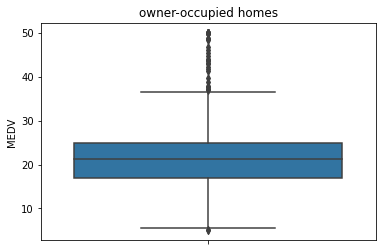

In [3]:
bp = sns.boxplot(y = 'MEDV', data = boston_df)
bp.set_title('owner-occupied homes')

### Box Plot Explanation: Box Plot minimum value, the first quartile, the median, the third quartile, and the maximum value for MEDV. Median Value is slightly above 20, max value slighty below 40...

Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'number of homes')

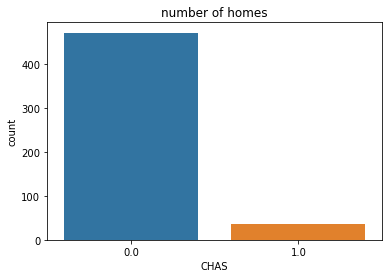

In [4]:
hist = sns.countplot(x = 'CHAS', data = boston_df)
hist.set_title('number of homes')

### Bar Plot Explanation: Most of the homes are not near the Charles River

## Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

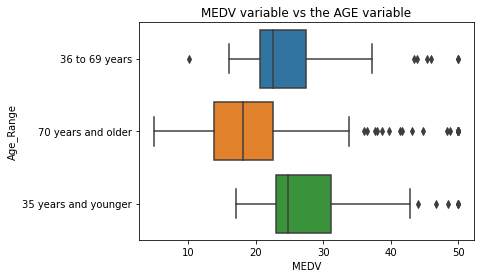

In [5]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Range'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Range'] = '36 to 69 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Range'] = '70 years and older'

bp2 = sns.boxplot(x = 'MEDV', y = 'Age_Range', data = boston_df)
bp2.set_title('MEDV variable vs the AGE variable')

### Box Plot Explanation: When looking at median values, MEDV appears to be inversely coorelated to age

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')

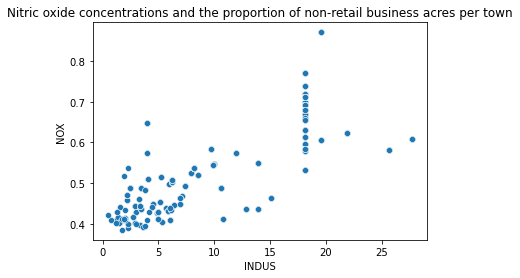

In [6]:
sp = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
sp.set_title('Nitric oxide concentrations and the proportion of non-retail business acres per town')

### Scatter Plot Explanation: NOX and INDUS appear to be coorelated - The more business acres, the more nitric oxide

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'pupil to teacher ratio')

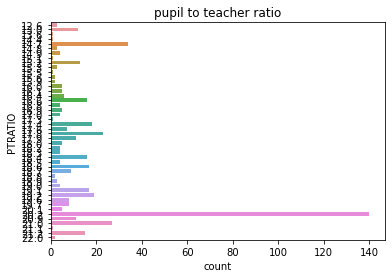

In [7]:
hist2 = sns.countplot(y = 'PTRATIO', data = boston_df)
hist2.set_title('pupil to teacher ratio')

## Use the appropriate tests to answer the questions provided

## Is there a significant difference in median value of houses bounded by the Charles river or not? 
(T-test for independent samples)

In [8]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_A'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_A'] = 'NEAR'

scipy.stats.ttest_ind(boston_df[boston_df['CHAS_A'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_A'] == 'NEAR']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

### Conclusion: Reject the Null Hypothesis

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [9]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


### Conclusion: Failed to accept the Null Hypothesis

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [10]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

### Conclusion: Reject the Null Hypothesis

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [11]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predisction = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.21e-08
Time:                        12:25:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""